In [1]:
! which python

/Users/no_lineal/opt/anaconda3/envs/research36/bin/python


In [2]:
import pandas as pd
import numpy as np
import math

import mat73

import os

from tqdm import tqdm

# viz
import plotly.express as px

In [3]:
"""

    where am i?

"""

PATH = os.getcwd() + '/'
data_path = PATH + 'data/'

print(f'PATH: {PATH}')
print(f'data path: {data_path}')

PATH: /Users/no_lineal/Documents/GitHub/eeg_processing/
data path: /Users/no_lineal/Documents/GitHub/eeg_processing/data/


In [4]:
"""

    load data

"""

# signal
folder_name = 'LFP_conditions/'

# dorsal
d_cong = mat73.loadmat( data_path + folder_name + 'dcong.mat' )['dcong']
d_incong = mat73.loadmat( data_path + folder_name + 'dincg.mat' )['dincg']

In [5]:
"""

    dorsal trials

"""

d_cong_trial = sorted( [ x for x in d_cong.keys() if 'STN' in x ] )
d_incong_trial = sorted( [ x for x in d_incong.keys() if 'STN' in x ] )

trials = sorted(list(set(d_cong_trial).intersection( set(d_incong_trial) )))

print( f'd_cong_trial: {d_cong_trial}' )
print( f'd_incong_trial: {d_incong_trial}' )
print( f'trials: {trials}' )

d_cong_trial: ['STN02', 'STN03', 'STN07a', 'STN08', 'STN10a', 'STN10b', 'STN11', 'STN13']
d_incong_trial: ['STN02', 'STN07a', 'STN08', 'STN10a', 'STN10b', 'STN11', 'STN13']
trials: ['STN02', 'STN07a', 'STN08', 'STN10a', 'STN10b', 'STN11', 'STN13']


In [6]:
"""

    signals

"""

def get_len( signals ):
    
    columns_names = [
        'len'
    ]
    
    feat = []
    
    for s in tqdm( range(signals.shape[0]) ):
        
        tmp = signals[s]
        tmp = tmp[ ~np.isnan(tmp) ]
        
        len_ = len(tmp)
        
        feat.append( [ len_ ] )
        
    return pd.DataFrame( feat, columns=columns_names )

# response
cue_type = 'sigcue'

# input
cue_in = pd.DataFrame()

for s in trials:
    
    cue_cong = d_cong[ s ][ cue_type ][0][ 'dCong_trl' ]
    cue_incong = d_incong[ s ][ cue_type ][0][ 'dIncg_trl' ]
    
    print(s)
    print(f'cue cong shape: {cue_cong.shape}')
    print(f'cue incong shape: {cue_incong.shape}')
    
    # compute real length of trials
    cue_cong_len = get_len(cue_cong)
    cue_incg_len = get_len(cue_incong)
    
    # format
    cue_cong_in = cue_cong_len.copy()
    cue_incg_in = cue_incg_len.copy()
    
    cue_cong_in['S'] = s
    cue_incg_in['S'] = s
    
    cue_cong_in['label'] = 0
    cue_incg_in['label'] = 1
    
    cue_in_s = pd.concat( [cue_cong_in, cue_incg_in], axis=0 )
    
    if cue_in.empty:
        
        cue_in = cue_in_s
        
    else:
        
        cue_in = pd.concat( [cue_in, cue_in_s], axis=0 )
    
    print(f'cue input subject: {cue_in_s.shape}')
    
    print('\n')
    
print(f'cue input: {cue_in.shape}')
cue_in.head()

STN02
cue cong shape: (73, 4600)
cue incong shape: (65, 2399)


100%|██████████| 65/65 [00:00<00:00, 46130.25it/s]


cue input subject: (138, 3)


STN07a
cue cong shape: (38, 3411)
cue incong shape: (38, 33688)


100%|██████████| 38/38 [00:00<00:00, 11101.45it/s]


cue input subject: (76, 3)


STN08
cue cong shape: (154, 2313)
cue incong shape: (162, 2098)


100%|██████████| 162/162 [00:00<00:00, 73600.22it/s]


cue input subject: (316, 3)


STN10a
cue cong shape: (54, 2216)
cue incong shape: (55, 2190)


100%|██████████| 55/55 [00:00<00:00, 17101.84it/s]


cue input subject: (109, 3)


STN10b
cue cong shape: (95, 2105)
cue incong shape: (87, 1896)


100%|██████████| 87/87 [00:00<00:00, 50436.00it/s]


cue input subject: (182, 3)


STN11
cue cong shape: (140, 2293)
cue incong shape: (120, 2290)


100%|██████████| 120/120 [00:00<00:00, 58998.53it/s]


cue input subject: (260, 3)


STN13
cue cong shape: (84, 2315)
cue incong shape: (76, 2362)


100%|██████████| 76/76 [00:00<00:00, 35394.97it/s]

cue input subject: (160, 3)


cue input: (1241, 3)


,len,S,label
0,4590,STN02,0
1,2066,STN02,0
2,1913,STN02,0
3,1563,STN02,0
4,1758,STN02,0


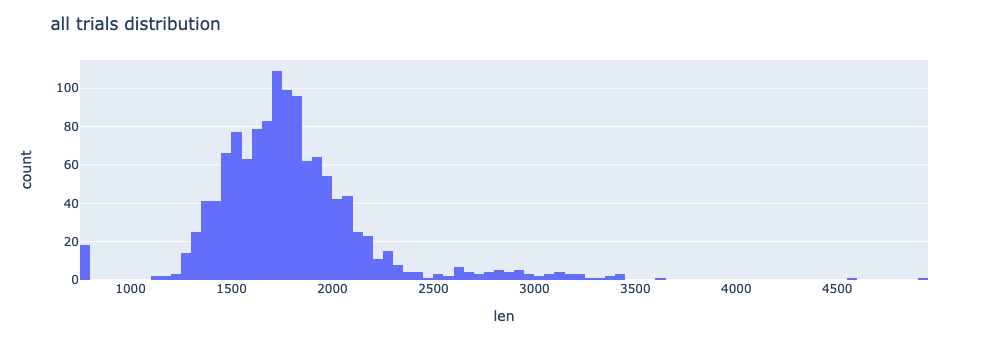

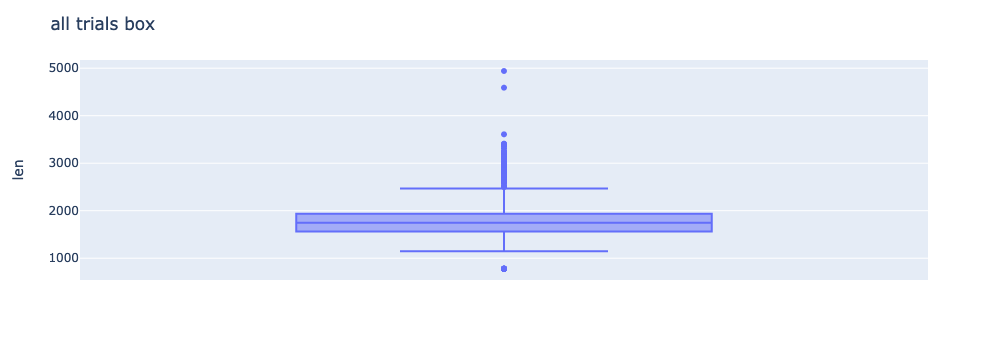

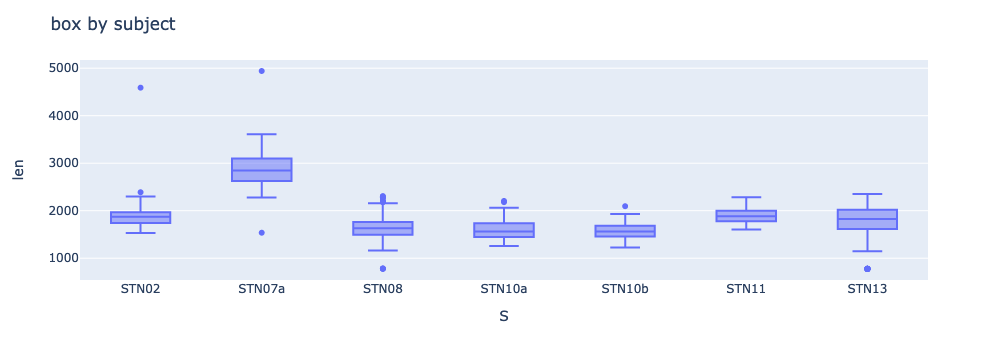

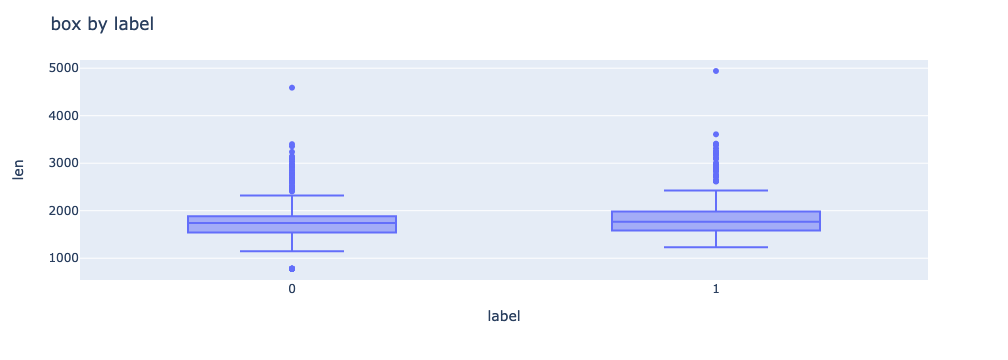

In [15]:
"""

    viz trials 

"""

# remove outlier from ['STN07a']
cue_in = cue_in[ cue_in['len'] < 10000 ]

fig = px.histogram(cue_in, x='len')
fig.update_layout(title='all trials distribution') 
fig.show()

fig = px.box(cue_in, y='len')
fig.update_layout(title='all trials box') 
fig.show()

fig = px.box(cue_in, x='S', y='len')
fig.update_layout(title='box by subject')
fig.show()

fig = px.box(cue_in, x='label', y='len')
fig.update_layout(title='box by label')
fig.show()